## Introduction to Statistical Learning Chapter 8 Excercise 9
### This problem involves the OJ data set which is part of the ISLR package.

### 1. Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score

### 2. Data processing and cleaning

In [16]:
data =pd.read_csv('OJ.csv')
#print(data['Purchase'].unique())
#print(data['Store7'].unique())
data['Purchase'] = data['Purchase'].replace(['CH','MM'],[0,1]) 
data['Store7'] = data['Store7'].replace(['No','Yes'],[0,1])
X = data.iloc[:,1:]
y = data['Purchase']

### 3. Questions
### (a) Create a training set containing a random sample of 800 observations,and a test set containing the remaining observations.

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = data.shape[0]-800,random_state=1)

### (b) Fit a tree to the training data, with Purchase as the responseand the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?                                                                                                                                           

A tree depth of 6 is chosen for the ease of visualisation of the tree plot.  
Training error rate                 : 0.1162    
The full tree has 47 terminal nodes.

In [18]:
tr_clf = DecisionTreeClassifier(max_depth=6).fit(X_train,y_train)
print("                        Unpruned Tree Summary")
print("=========================================================================")
print("Training error rate                 :" ,round(1-tr_clf.score(X_train,y_train),4))
print("Test error rate                     :" ,round(1-tr_clf.score(X_test,y_test),4))
print("Depth of the fitted tree            :", tr_clf.get_depth())

                        Unpruned Tree Summary
Training error rate                 : 0.1162
Test error rate                     : 0.2111
Depth of the fitted tree            : 6


### (c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

The full tree has 47 terminal nodes, here we only zoomed into 8 of them. Looking at the right most terminal node, this node has a purity measure given by the Gini index at 0.397, there are a total of 11 samples in this node, with 8 of which belonging to class ‘CH’ and 3 of them belonging to ‘MM’. Finally class = CH means that future sample points that fall into this node will be classified to the class CH, since the majority of training samples(8) in this node belongs to class CH.

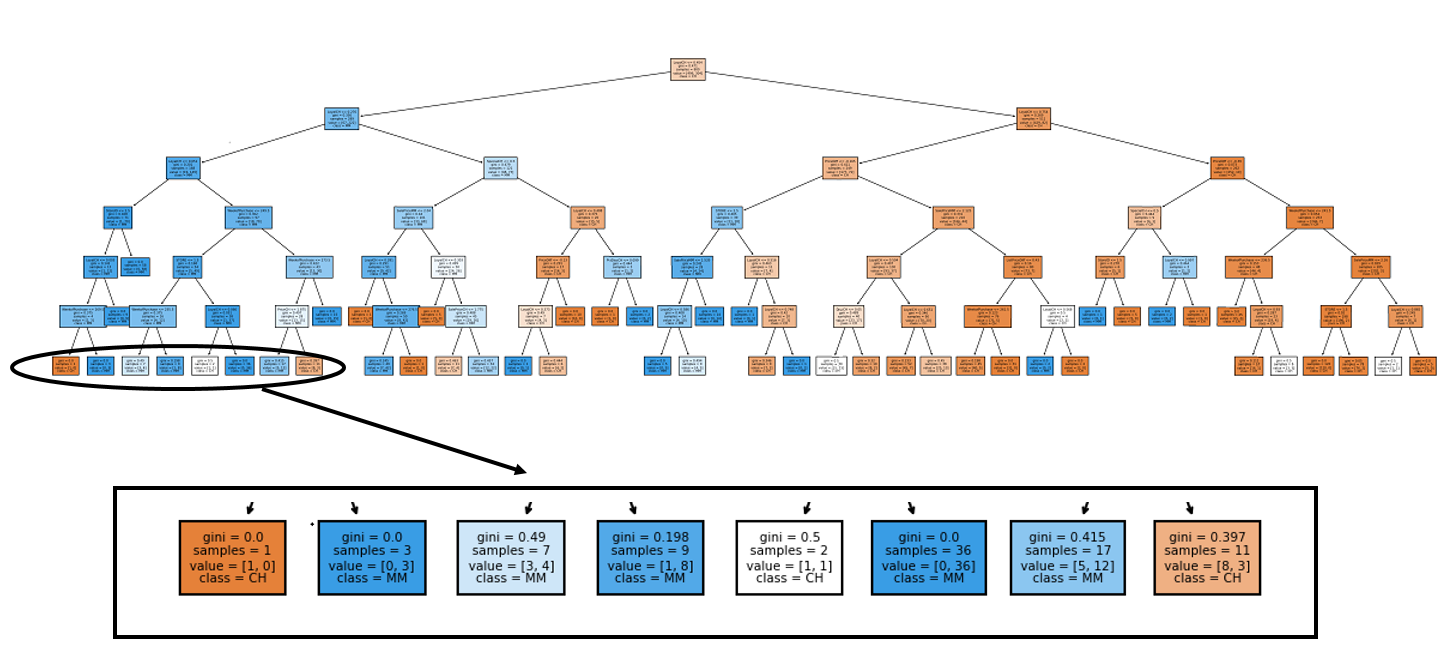

### (d) Create a plot of the tree, and interpret the results.

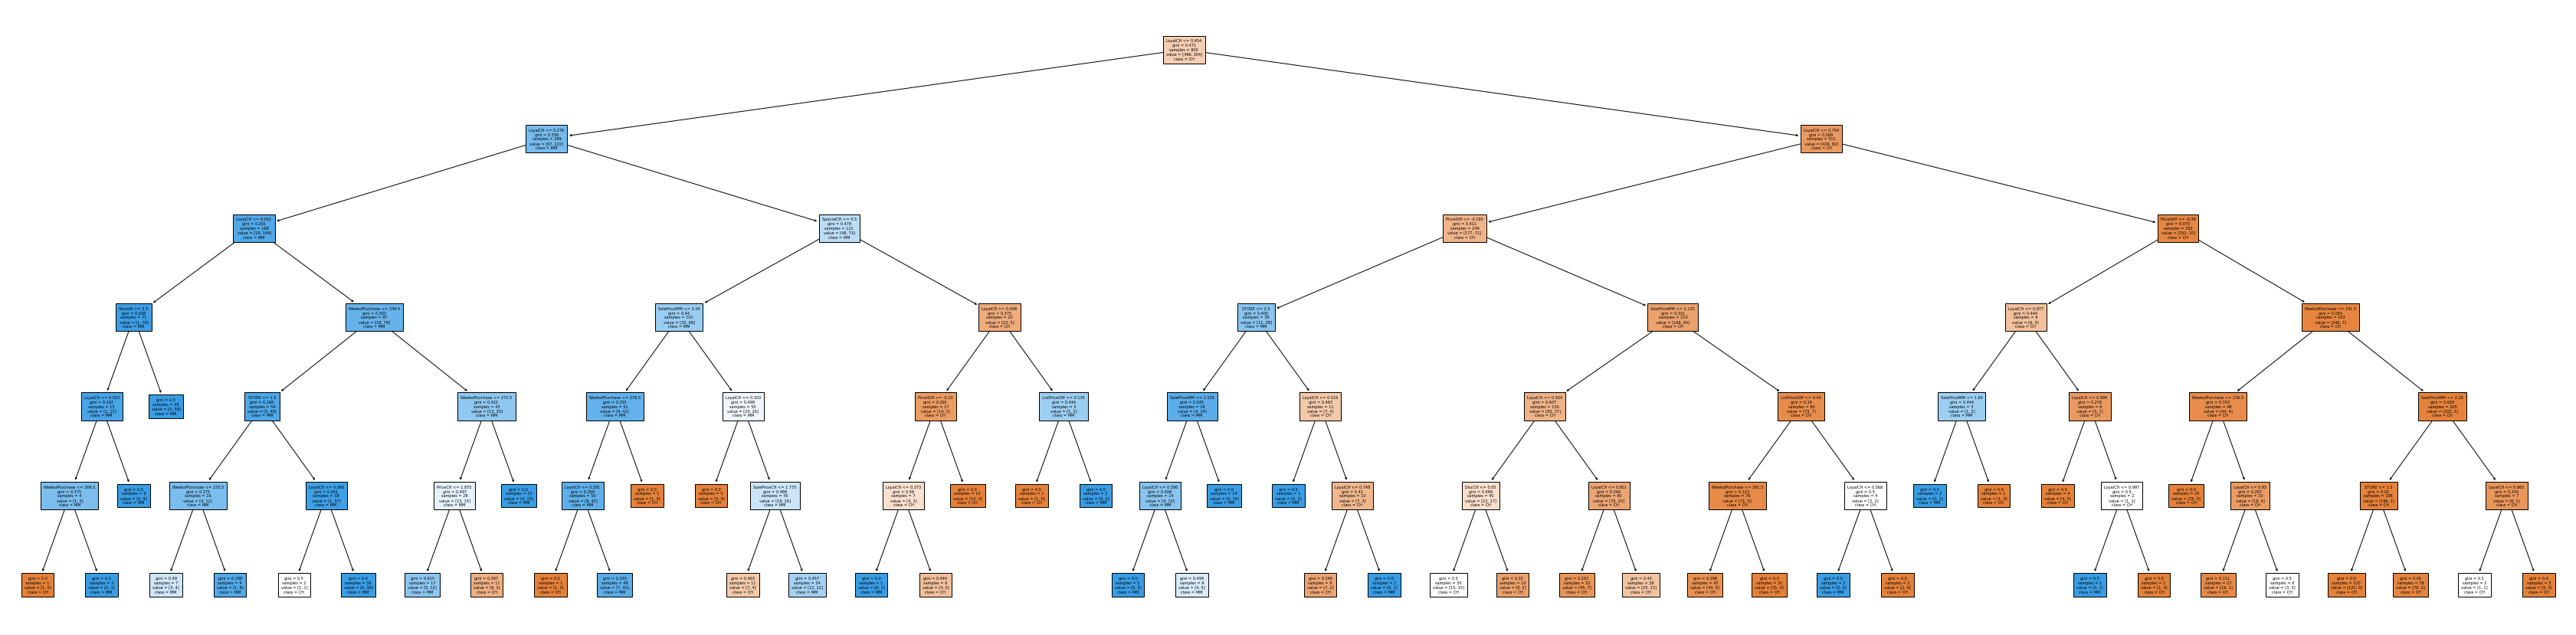

In [19]:
plt.figure(figsize=(60,15))  # set plot size (denoted in inches)
plot_tree(tr_clf, feature_names = X.columns, class_names=['CH','MM'],fontsize=5,filled='True')
#plt.savefig('tree_high_dpi', dpi=150,bbox_inches = "tight")
plt.show()

### (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels.What is the test error rate?
Test error rate                     : 0.2074


In [20]:
y_pred = tr_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix")
print(cm)

Confusion matrix
[[139  18]
 [ 39  74]]


### (f) Apply the cv.tree() function to the training set in order to determine the optimal tree size.
### (g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.


Text(0, 0.5, 'Cross-validated classification error rate')

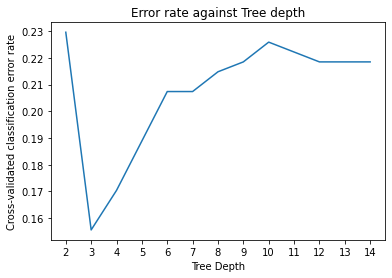

In [21]:
score =[]
for i in range(2,15):
    tr_clf = DecisionTreeClassifier(max_depth=i,random_state=1)
    scores = cross_val_score(tr_clf,X_test,y_test,cv=10)
    score.append(np.mean(scores)) 

" Plot the error rate against tree depth "
plt.plot([i for i in range(2,15)],[round(1-j,4) for j in score])
plt.title("Error rate against Tree depth")
plt.xlabel("Tree Depth")
plt.xticks([i for i in range(2,15)])
plt.ylabel("Cross-validated classification error rate")

### (h) Which tree size corresponds to the lowest cross-validated classification error rate?
Using 10-fold cross validation to find the optimal maximum depth of the tree, it is found that using a max depth of 3 gives the best accuracy on the test set.


### (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

                          Pruned Tree Summary
Training error rate                 : 0.1525
Test error rate                     : 0.1815
Depth of the fitted tree            : 3
Number of leaves on the fitted tree : 8


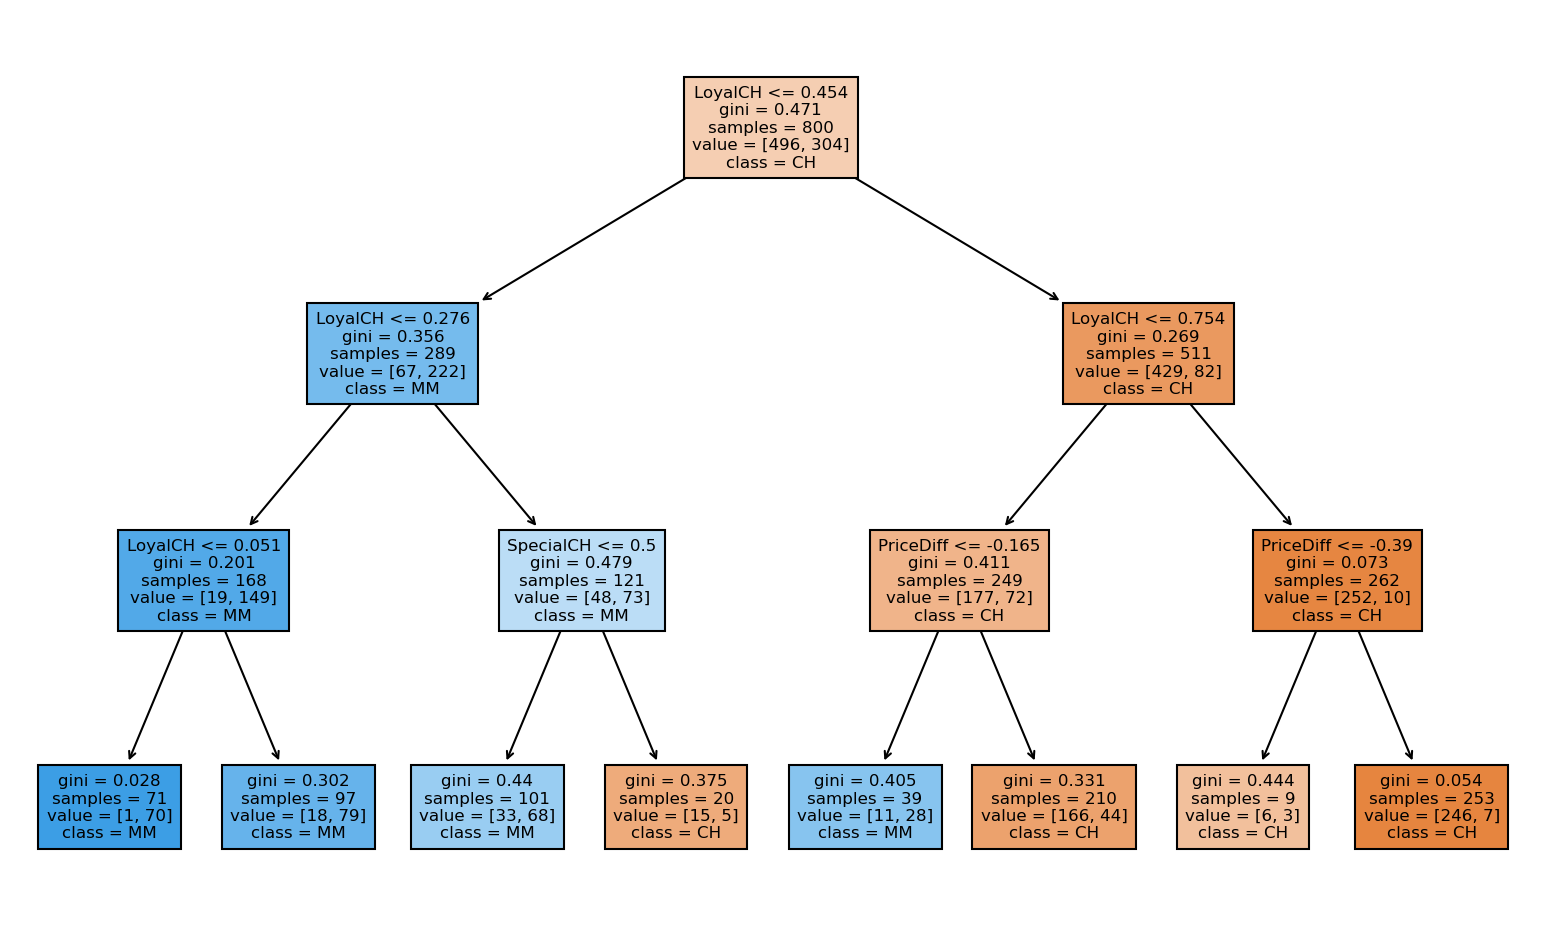

In [22]:
tr_clf = DecisionTreeClassifier(max_depth=3,random_state=1).fit(X_train,y_train)
print("                          Pruned Tree Summary")
print("=========================================================================")
print("Training error rate                 :" ,round(1-tr_clf.score(X_train,y_train),4))
print("Test error rate                     :" ,round(1-tr_clf.score(X_test,y_test),4))
print("Depth of the fitted tree            :", tr_clf.get_depth())
print("Number of leaves on the fitted tree :", tr_clf.get_n_leaves())

plt.figure(figsize=(13,8),dpi=150)  # set plot size (denoted in inches)
plot_tree(tr_clf, feature_names = X.columns, class_names=['CH','MM'],fontsize=8,filled='True')
plt.show()

### (j) Compare the training error rates between the pruned and unpruned trees. Which is higher?
In terms of training error rate, the pruned tree( tree depth of 3) has a higher training error rate.
### (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?
In terms of test error rate, the pruned tree has a lower test error rate.